THE SPARKS FOUNDATION


EXPLORATORY DATA ANALYSIS - RETAIL

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('SampleSuperstore.csv')
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
data.shape

(9994, 13)

In [7]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [15]:
data['Country'].unique()

array(['United States'], dtype=object)

In [9]:
#Checking for null values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
data.duplicated().sum()

17

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [30]:
dt = data.drop(['Country','Segment','Sub-Category','Postal Code'],axis=1)
dt.head()

,Ship Mode,City,State,Region,Category,Sales,Quantity,Discount,Profit
0,Second Class,Henderson,Kentucky,South,Furniture,261.9600,2,0.00,41.9136
1,Second Class,Henderson,Kentucky,South,Furniture,731.9400,3,0.00,219.5820
2,Second Class,Los Angeles,California,West,Office Supplies,14.6200,2,0.00,6.8714
3,Standard Class,Fort Lauderdale,Florida,South,Furniture,957.5775,5,0.45,-383.0310
4,Standard Class,Fort Lauderdale,Florida,South,Office Supplies,22.3680,2,0.20,2.5164


In [32]:
#relationship analysis
corelation = dt.corr()

C:\Users\laku1\AppData\Local\Temp\ipykernel_29184\3884401557.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = dt.corr()


<Axes: >

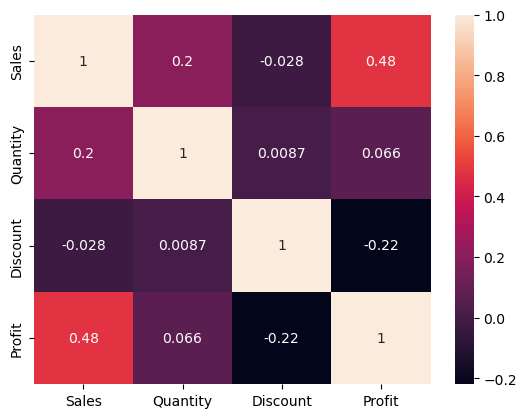

In [33]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

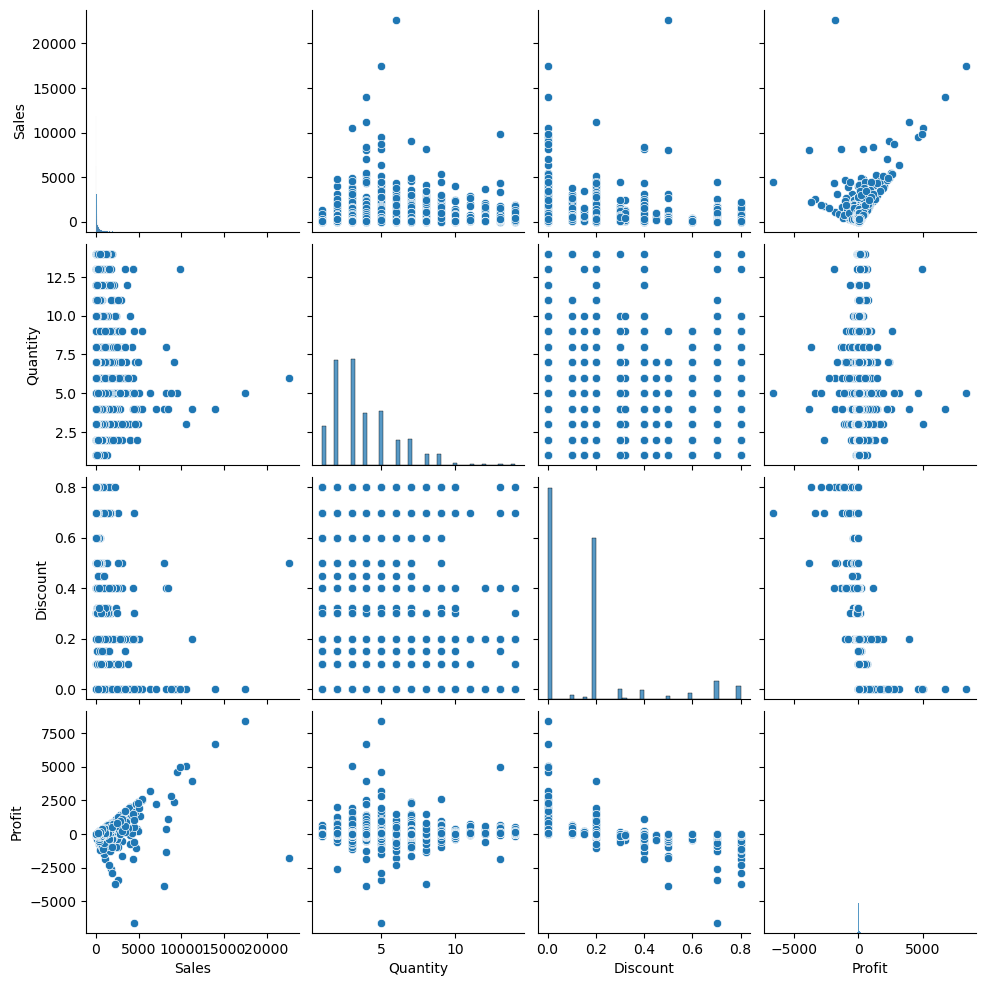

In [37]:
sns.pairplot(dt)

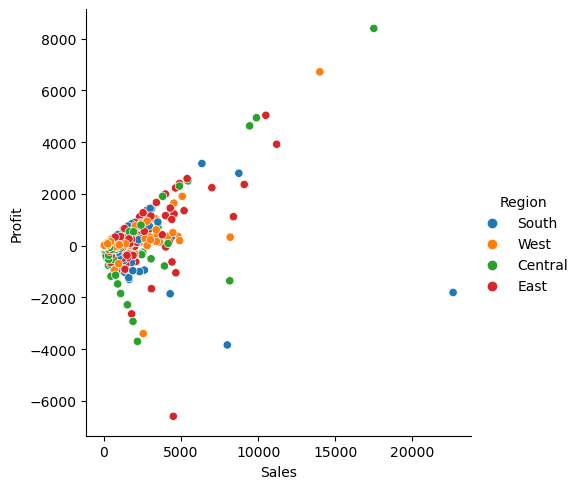

In [43]:
#Sales by Region 
sns.relplot(x='Sales',y='Profit',hue='Region',data=dt)

<Axes: xlabel='Quantity', ylabel='Count'>

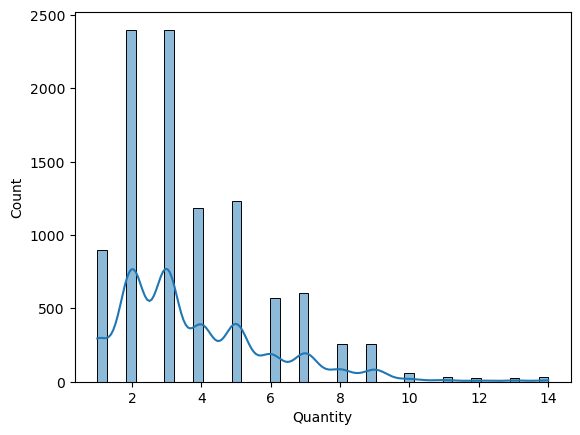

In [51]:
sns.histplot(dt['Quantity'],kde=True)

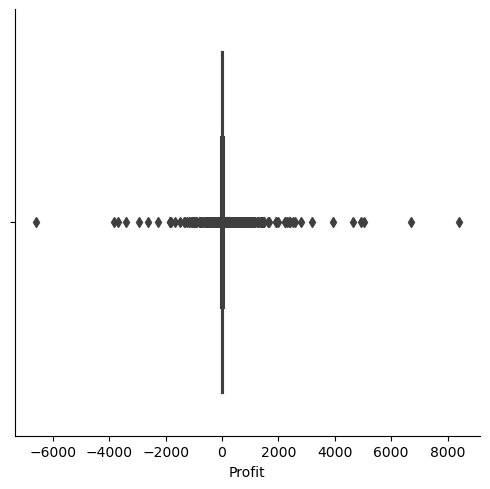

In [55]:
sns.catplot(x='Profit',kind = 'box', data = dt)

In [57]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<Axes: xlabel='Ship Mode', ylabel='count'>

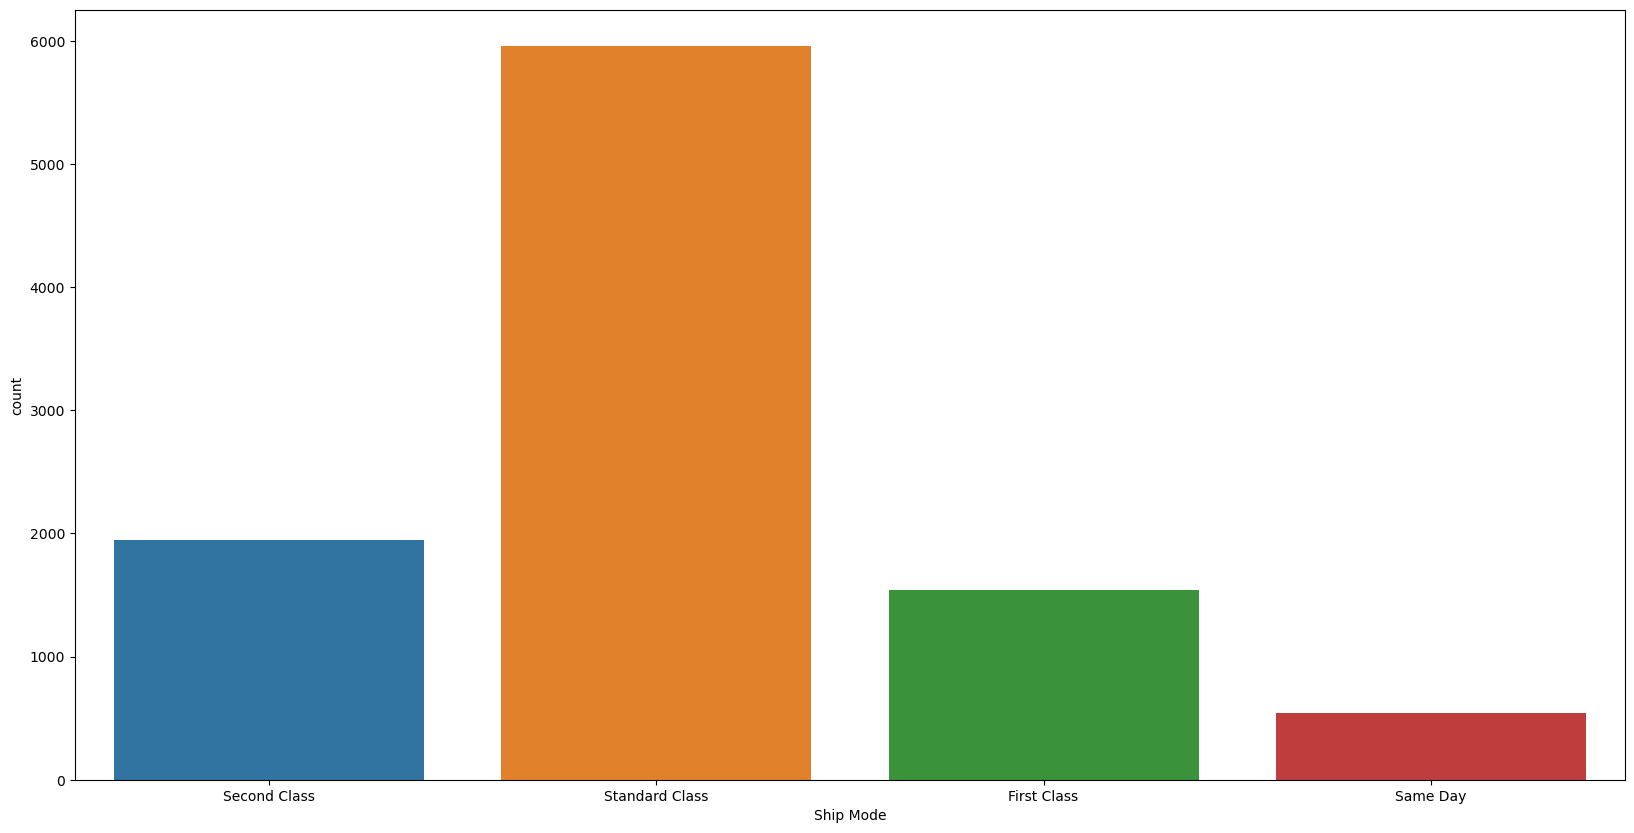

In [60]:
#Based on Ship Mode
plt.figure(figsize=(20,10))
sns.countplot(x='Ship Mode',data=dt)

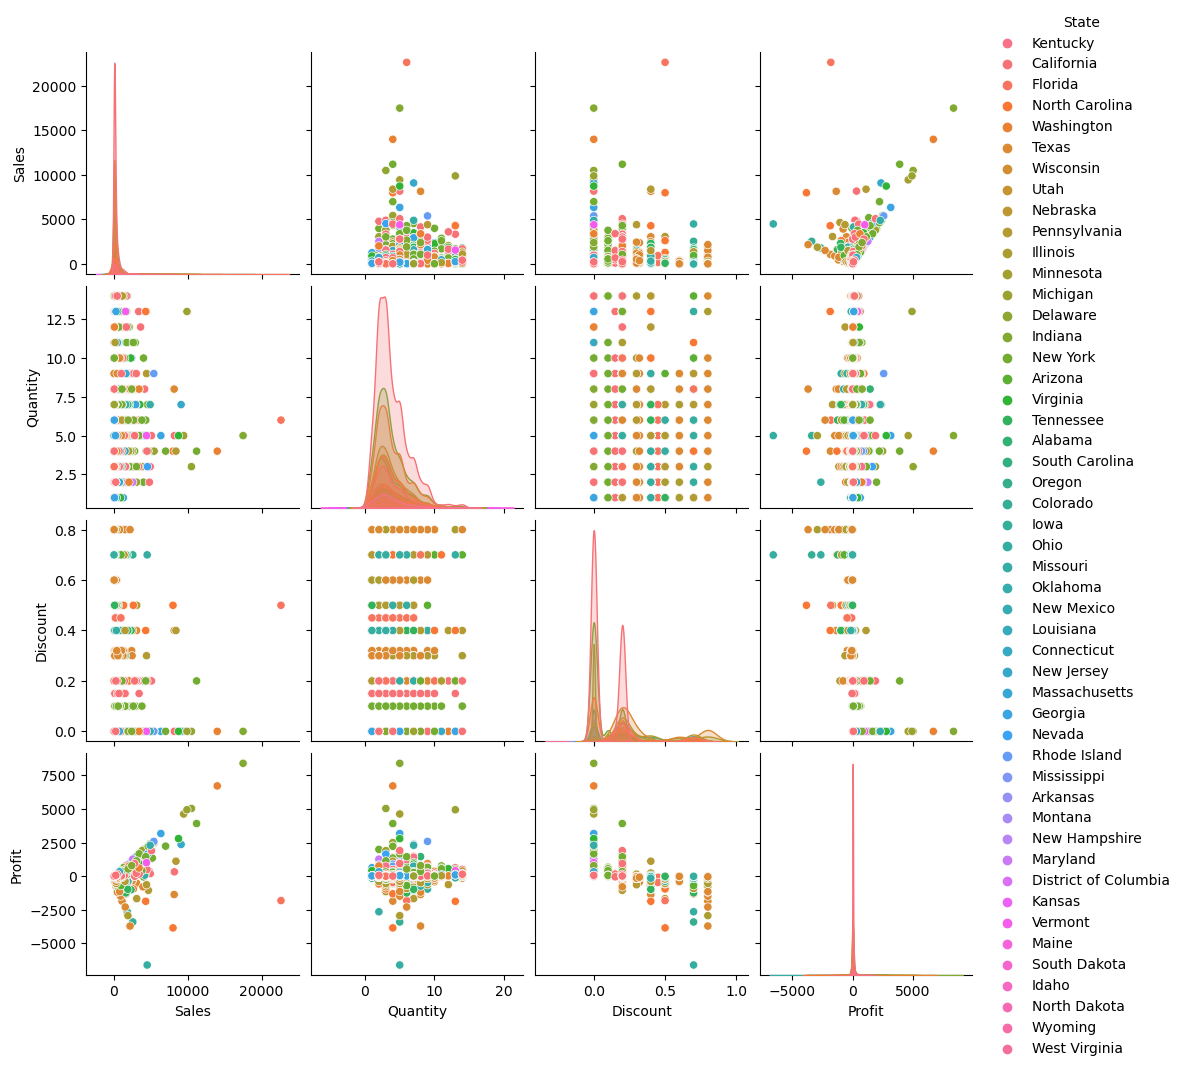

In [61]:
#Based on State
sns.pairplot(dt,hue='State')

<Axes: xlabel='State', ylabel='count'>

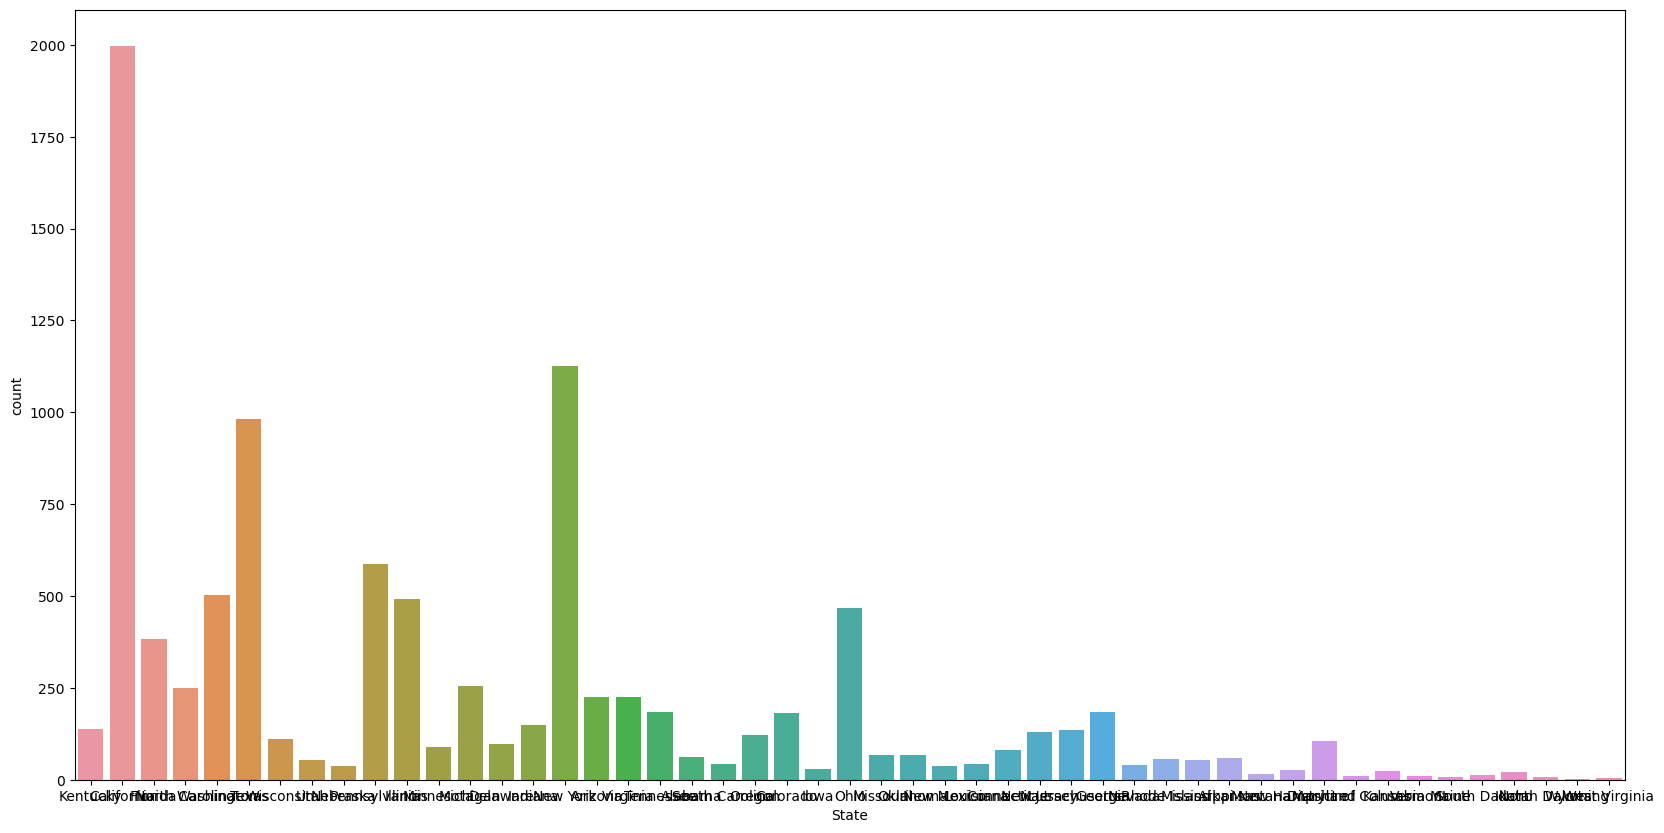

In [62]:
plt.figure(figsize=(20,10))
sns.countplot(x='State',data=dt)